In [ ]:
# Assignment : A2
# Mohammed Intekhab : 2018AD04076
# Ajay Sharma       : 2018AD04064
# Avinash Chandra   : 2018AD04061

# Question 2

Write Python code to build a neural network with the following details. 

    - Input data = Iris dataset
    - Number of hidden layers = 1
    - Number of units in hidden layer = 10
    - Number of iterations = 5000 
    - Learning algorithm = stochastic gradient descent
    - Activation = logistic
    - Learning rate =  0.0001, 0.001, 0.01, 0.1, 1


1. Compare the training score for each learning rate. 
2. Plot the loss curve for each  learning rate. 
3. Report execution time for each learning rate as a bar graph. (Use library time and time() method) 


## Expectations

1. Expected output: (approximately)
    - Training accuracy 0.0001 is xx.xxx
    - Training accuracy 0.001 is xx.xxx
    - Training accuracy 0.01 is xx.xxx
    - Training accuracy 0.1 is xx.xxx
    - Training accuracy 1 is xx.xxx 
    
2. Graph: Training Loss (Actual output may vary)
![title](images/op-learning.png)

3. Bar graph: Execution Time (Actual output may vary)
![title](images/time-learning.png)

You are expected to modify this notebook and upload the modified file as assignment submission.

<b> PS: Code written within the block will be evaluted. Other code will be ignored.
#### start code here
#### end code here

In [1]:
from sklearn import datasets  
import numpy as np
import warnings
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset.

iris = datasets.load_iris()

# Extract all columns except last from the dataset for X values.
# y is the target column.

X = iris["data"][:,:-1]  
y = iris["target"]

# Split data into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size= 0.3)

# normalise the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
# Use the library function sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Build neural network for each learning rate. (max 10 lines of code) Use loop.
# start code here
labels = ["learning-rate 0.0001","learning-rate 0.001","learning-rate 0.01",\
          "learning-rate 0.1","learning-rate 1"]
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'black', 'linestyle': '-'},
             {'c': 'magenta', 'linestyle': '-'}]
inp_learning_rate =  [0.0001, 0.001, 0.01, 0.1, 1]
mlps = []
time_list = []
for rate in inp_learning_rate:
    mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',activation='logistic',learning_rate_init=rate,\
                        max_iter=5000)
# Using magic function %timeit to measure time
    timetaken = %timeit -o mlp.fit(X_train, y_train)
    time_list.append(timetaken.best*1000) ## converting seconds to milliseconds
    mlps.append(mlp)    
# end code here

The slowest run took 36.01 times longer than the fastest. This could mean that an intermediate result is being cached.
32.3 ms ± 46.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
557 ms ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
439 ms ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
123 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.6 ms ± 835 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
# Compare the training  score for each learning rate. (max 2 lines of code) Use loop.

# start code here
for rate in inp_learning_rate :
    #print ("Training Accuracy ",rate , "is ",mlps[inp_learning_rate.index(rate)].score(X_train, y_train))
    print("Training Accuracy {0} is {1} ".format(rate,mlps[inp_learning_rate.index(rate)].score(X_train, y_train)))
# end code here

Training Accuracy 0.0001 is 0.3333333333333333 
Training Accuracy 0.001 is 0.8476190476190476 
Training Accuracy 0.01 is 0.9619047619047619 
Training Accuracy 0.1 is 0.9714285714285714 
Training Accuracy 1 is 0.9809523809523809 


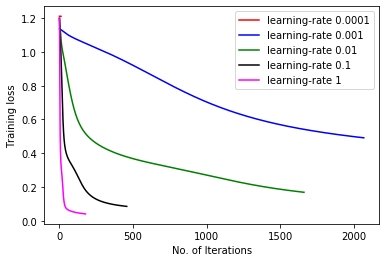

In [4]:
# Plot the loss curve for each learning rate. (max 5 lines of code) Use loop.
for mlp,args,label in zip(mlps,plot_args,labels):
    plt.plot(mlp.loss_curve_, **args,label=label)
plt.legend(loc='best')
plt.xlabel('No. of Iterations')
plt.ylabel('Training loss')
plt.show()
# end code here

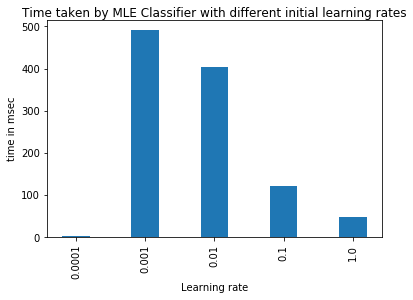

In [5]:
# Plot the execution time as bar graph. (max 5 lines of code)

# start code here
plt.bar(x=[0,2,4,6,8],height=time_list)
plt.xticks([0,2,4,6,8],('0.0001', '0.001', '0.01', '0.1','1.0'), rotation=90)
plt.xlabel('Learning rate')
plt.ylabel('time in msec')
plt.title('Time taken by MLE Classifier with different initial learning rates',pad=1.2)
plt.show()
# end code here